In [2]:
import os

os.chdir('/Users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker')

from find_contact_map import *
from mapping import *
from select_nr_set import *
from extract_contacts import *

seq_dict=parse_general_file('./structures_annotation/general.txt')

# Chain dictionary
general_df=pd.read_csv('./structures_annotation/general.txt', sep='\t')
chain_dict = {}
for pdb_id, group in general_df.groupby('pdb.id'):
    chains = {
            'tcra_chain': None,
            'tcrb_chain': None,
            'peptide_chain': None,
            'mhc_chain': None
        }
        
    for _, row in group.iterrows():
        if row['chain.component'] == 'TCR' and row['chain.type'] == 'TRA':
            chains['tcra_chain'] = row['chain.id']
        elif row['chain.component'] == 'TCR' and row['chain.type'] == 'TRB':
            chains['tcrb_chain'] = row['chain.id']
        elif row['chain.component'] == 'PEPTIDE':
            chains['peptide_chain'] = row['chain.id']
        elif row['chain.component'] == 'MHC' and row['chain.type'] == 'MHCa':
            chains['mhc_chain'] = row['chain.id']
        
    chain_dict[pdb_id] = chains

In [10]:
test_pdbs=[]
epitopes={}
for file in os.listdir("./input/input_test"):
    if file.endswith(".csv"):
        pdb_id = file.split('_')[0]
        test_pdbs.append(pdb_id)
        pdb_path = f"./pdb_files/{pdb_id}.pdb"
        alpha_seq, beta_seq, epitope=extract_specific_sequences(pdb_path, seq_dict)
        epitopes[pdb_id]=epitope

In [13]:
import random
import csv
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

def generate_unrelated_epitope(epitope, num_sequences=1000):
    # P2 is position 1 (index 1 in Python) and Plast is the last position
    P2 = epitope[1]  # P2 (second position)
    Plast = epitope[-1]  # Plast (last position)

    unrelated_epitopes = []
    for _ in range(num_sequences):
        # Generate a random sequence with the same length, keeping P2 and Plast
        random_seq = [random.choice(amino_acids) for _ in range(len(epitope))]
        random_seq[1] = P2  # Keep P2 fixed
        random_seq[-1] = Plast  # Keep Plast fixed
        unrelated_epitopes.append(''.join(random_seq))
    
    return unrelated_epitopes

# Create and write to individual CSV files named after each epitope ID
for epitope_id, epitope_seq in epitopes.items():
    filename = f"./input/{epitope_id}_epitopes.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        unrelated_epitopes = generate_unrelated_epitope(epitope_seq)
        writer.writerow([epitope_id, epitope_seq])  # Write the first row with the original
        for unrelated in unrelated_epitopes:
            writer.writerow([epitope_id, unrelated])  # Write the 1000 unrelated sequences

# Outputting file paths for download
[f"/mnt/data/{epitope_id}_epitopes.csv" for epitope_id in epitopes]



['/mnt/data/3vxs_epitopes.csv',
 '/mnt/data/5eu6_epitopes.csv',
 '/mnt/data/8wul_epitopes.csv',
 '/mnt/data/8shi_epitopes.csv',
 '/mnt/data/7n1e_epitopes.csv',
 '/mnt/data/3vxu_epitopes.csv',
 '/mnt/data/6vrn_epitopes.csv',
 '/mnt/data/5tez_epitopes.csv',
 '/mnt/data/7qpj_epitopes.csv',
 '/mnt/data/3mv9_epitopes.csv',
 '/mnt/data/5isz_epitopes.csv',
 '/mnt/data/3o4l_epitopes.csv',
 '/mnt/data/8f5a_epitopes.csv',
 '/mnt/data/1mi5_epitopes.csv',
 '/mnt/data/4qrr_epitopes.csv',
 '/mnt/data/4jry_epitopes.csv',
 '/mnt/data/3ffc_epitopes.csv',
 '/mnt/data/4qrp_epitopes.csv',
 '/mnt/data/8dnt_epitopes.csv',
 '/mnt/data/2vlj_epitopes.csv']

In [15]:
import os
import csv

# Path to the directory with CSV files
directory = 'input/epitopes'

# Loop through each file in the directory
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        output_path = os.path.join(directory, f"processed_{file}")  # Save processed file with a new name
        
        # Read the file and process it
        with open(file_path, mode='r') as infile, open(output_path, mode='w', newline='') as outfile:
            reader = csv.reader(infile)
            writer = csv.writer(outfile)
            
            # Write the header 'peptide'
            writer.writerow(['peptide'])
            
            # Process each row, remove PDB ID, and write only the epitope
            for row in reader:
                if len(row) > 1:  # Only process rows with PDB ID and epitope
                    writer.writerow([row[1]])  # Write only the epitope

        print(f"Processed file saved as: {output_path}")


Processed file saved as: input/epitopes/processed_3o4l_epitopes.csv
Processed file saved as: input/epitopes/processed_6vrn_epitopes.csv
Processed file saved as: input/epitopes/processed_4qrr_epitopes.csv
Processed file saved as: input/epitopes/processed_8dnt_epitopes.csv
Processed file saved as: input/epitopes/processed_8f5a_epitopes.csv
Processed file saved as: input/epitopes/processed_3vxu_epitopes.csv
Processed file saved as: input/epitopes/processed_5tez_epitopes.csv
Processed file saved as: input/epitopes/processed_3vxs_epitopes.csv
Processed file saved as: input/epitopes/processed_7qpj_epitopes.csv
Processed file saved as: input/epitopes/processed_3mv9_epitopes.csv
Processed file saved as: input/epitopes/processed_1mi5_epitopes.csv
Processed file saved as: input/epitopes/processed_5eu6_epitopes.csv
Processed file saved as: input/epitopes/processed_8wul_epitopes.csv
Processed file saved as: input/epitopes/processed_8shi_epitopes.csv
Processed file saved as: input/epitopes/processe

In [16]:
epitopes

{'3vxs': 'RYPLTLGWCF',
 '5eu6': 'YLEPGPVTV',
 '8wul': 'VVGAVGVGK',
 '8shi': 'VRSRRXLRL',
 '7n1e': 'RLQSLQTYV',
 '3vxu': 'RFPLTFGWCF',
 '6vrn': 'HMTEVVRHC',
 '5tez': 'GILGFVFTL',
 '7qpj': 'GLYDGMEHL',
 '3mv9': 'HPVGEADYFEY',
 '5isz': 'GILGFVFTL',
 '3o4l': 'GLCTLVAML',
 '8f5a': 'TSTLQEQIGW',
 '1mi5': 'FLRGRAYGL',
 '4qrr': 'IPSINVHHY',
 '4jry': 'LPEPLPQGQLTAY',
 '3ffc': 'FLRGRAYGL',
 '4qrp': 'HSKKKCDEL',
 '8dnt': 'LLLDRLNQL',
 '2vlj': 'GILGFVFTL'}

In [20]:
epitopes_df=pd.read_csv("./input/epitopes/4qrp_epitopes.txt")
for row in epitopes_df.iterrows():
    print(row[1]['peptide'])

HSKKKCDEL
FSWQPHTTL
MSIYVIAIL
GSSYMHHVL
ASLCDEASL
SSIRYYTTL
QSNHAVAEL
ESRWEVSCL
WSQDWHQKL
HSRTCFCRL
WSNIHIAEL
LSYTLVSVL
ASHGKDYGL
SSTQQLNQL
YSAPFCVAL
NSNWYYRVL
PSENQHENL
NSKFEWVRL
VSKKWVGLL
PSKTKYWVL
QSAVSGKEL
PSGNVYIHL
YSIVMTVLL
TSGTCQANL
SSHGSMGDL
CSMYKLRCL
QSQWPDVQL
FSEHILNML
ISMNDNYIL
CSPYFKGAL
DSAWTYGWL
KSCFKKRNL
CSFSFEFAL
TSPPVTQTL
DSQVRIHSL
YSERLRKGL
LSRGLKKQL
HSYRPHARL
ASFTDIKHL
PSKDQICDL
ISSGHEDPL
FSFDWLEPL
QSVRTHIML
GSYQKGMTL
YSCQILSKL
HSMQSKPRL
YSIKSKWGL
NSGMAMHRL
NSSGRTHSL
PSAEHQGVL
CSVAIVFVL
MSFVKGGDL
TSKKCSTFL
WSPEQFTIL
FSWMVYPDL
LSLCCGFTL
ASMGKWKML
MSEIVSQRL
CSMNNWPWL
FSCVYQTEL
WSSNCYCIL
QSESYPWML
HSMIWDYDL
MSHNCPAKL
WSDTRGISL
DSKHPMTYL
TSLEVQIGL
WSSGFLVTL
ASYPMNEML
ESYCLTDRL
RSFFPHSQL
NSKDADTEL
CSPDYHSLL
LSLQHYVHL
DSRNDATAL
KSQFNFTFL
DSTEPTVQL
SSRKINLLL
KSFMIENML
ESPTWNVEL
HSPHSGHEL
QSEHSPHDL
LSADPMIAL
PSQKRVKVL
LSLYSATSL
CSNAKWPAL
FSHGATVCL
SSQTKYYDL
YSMKVYTTL
DSCHRGWCL
MSYSYAMPL
PSHQKTQEL
VSGLVIQGL
CSARPMVKL
VSMLLNTYL
RSYYVPHLL
FSIKVAVLL
NSLNDNKNL
LSWVTIGIL
KSGVVEFQL


In [23]:
os.chdir('/Users/alexascunceparis/Desktop/BSC/immuno_project/tcren-ms')

In [25]:
import os
import shutil

# Directorio de entrada
input_directory = "./example/input_structures"
# Directorio donde se crearán las nuevas carpetas
output_directory = "./example/output_folders"

# Crear el directorio de salida si no existe
os.makedirs(output_directory, exist_ok=True)

# Iterar sobre los archivos en el directorio de entrada
for file in os.listdir(input_directory):
    # Obtener el nombre del archivo sin la extensión
    file_name, _ = os.path.splitext(file)
    
    # Crear una nueva carpeta con el nombre del archivo
    new_folder_path = os.path.join(output_directory, file_name)
    
    # Crear la carpeta
    os.makedirs(new_folder_path, exist_ok=True)
    
    # Mover el archivo a la nueva carpeta
    source_file_path = os.path.join(input_directory, file)
    destination_file_path = os.path.join(new_folder_path, file)
    
    # Mover el archivo
    shutil.move(source_file_path, destination_file_path)
    
    print(f"Archivo {file} movido a la carpeta: {new_folder_path}")

print("Proceso completado.")


Archivo 5tez.pdb movido a la carpeta: ./example/output_folders/5tez
Archivo 3vxs.pdb movido a la carpeta: ./example/output_folders/3vxs
Archivo 3mv9.pdb movido a la carpeta: ./example/output_folders/3mv9
Archivo 3o4l.pdb movido a la carpeta: ./example/output_folders/3o4l
Archivo 3vxu.pdb movido a la carpeta: ./example/output_folders/3vxu
Archivo .DS_Store movido a la carpeta: ./example/output_folders/.DS_Store
Archivo 4jry.pdb movido a la carpeta: ./example/output_folders/4jry
Archivo 2vlj.pdb movido a la carpeta: ./example/output_folders/2vlj
Archivo 7n1e.pdb movido a la carpeta: ./example/output_folders/7n1e
Archivo 6vrn.pdb movido a la carpeta: ./example/output_folders/6vrn
Archivo 8wul.pdb movido a la carpeta: ./example/output_folders/8wul
Archivo 7qpj.pdb movido a la carpeta: ./example/output_folders/7qpj
Archivo 8f5a.pdb movido a la carpeta: ./example/output_folders/8f5a
Archivo 8dnt.pdb movido a la carpeta: ./example/output_folders/8dnt
Archivo 5eu6.pdb movido a la carpeta: ./ex

In [32]:
import os
import pandas as pd

# Directorio donde están los archivos CSV
input_folder = "./rank_epitopes/output/theircode/theirmodel_classII/"
output_csv = "./rank_epitopes/output/theircode/theirmodel_classII/cognate_epitope_rank.csv"
results = []

# Iterar sobre todos los archivos en el directorio
for filename in os.listdir(input_folder):
    if filename.startswith("output_") and filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        data = pd.read_csv(file_path)
        
        # Obtener el pdb_id a partir del nombre del archivo
        pdb_id = filename.replace("output_", "").replace(".csv", "")
        pdb_path = f"./pdb_files/{pdb_id}.pdb"

        # Obtener las secuencias específicas (Asegúrate de que extract_specific_sequences esté bien definida)
        if pdb_id == "8shi":
            epitope="VRSRRALRL"
        else:
            try:
                alpha_seq, beta_seq, epitope = extract_specific_sequences(pdb_path, seq_dict)
            except Exception as e:
                print(f"Error extracting sequences for {pdb_id}: {e}")
                continue

        # Asegurarse de que el epítopo exista en el CSV
        if epitope in data['peptide'].values:
            cognate_score = data[data['peptide'] == epitope]['score'].values[0]
        else:
            print(f"Epitope {epitope} not found in {filename}")
            continue

        # Calcular el porcentaje de péptidos con puntuación menor que el cognate epitope
        num_peptides_lower = (data['score'] < cognate_score).sum()
        total_peptides = len(data)
        percentage_lower = (num_peptides_lower / total_peptides) * 100

        # Almacenar los resultados
        results.append({"pdb_id": pdb_id, "cognate_epitope_rank": percentage_lower})

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)

# Guardar el DataFrame en un archivo CSV
results_df.to_csv(output_csv, index=False)

print(f"Resultados guardados en {output_csv}")

Resultados guardados en ./rank_epitopes/output/theircode/theirmodel_classII/cognate_epitope_rank.csv


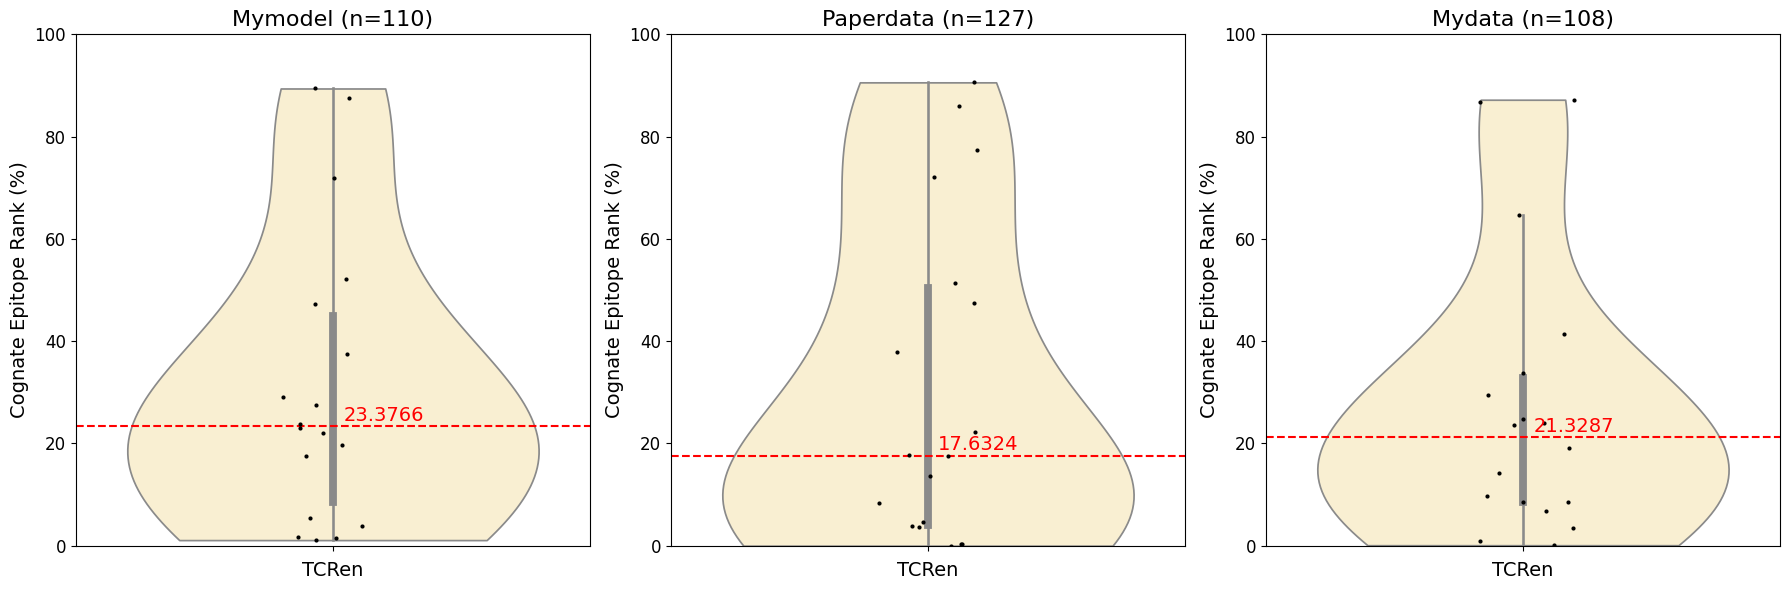

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for three different sets (as examples)
df_test1 = pd.read_csv('./rank_epitopes/output/theircode/mymodel/cognate_epitope_rank.csv')
df_test2 = pd.read_csv('./rank_epitopes/output/theircode/theirmodel_paperdata/cognate_epitope_rank.csv')
df_test3 = pd.read_csv('./rank_epitopes/output/theircode/theirmodel_mydata/cognate_epitope_rank.csv')

# List of DataFrames
dfs = [df_test1, df_test2, df_test3]

# Calculate the medians for each DataFrame
medians = [df['cognate_epitope_rank'].median() for df in dfs]

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust size as needed for 3 plots side by side

# Titles for each subplot (you can customize these)
titles = ["Mymodel (n=110)", "Paperdata (n=127)", "Mydata (n=108)"]

# Loop through each DataFrame and corresponding axis to create the plots
for i, (df, ax, median) in enumerate(zip(dfs, axes, medians)):
    # Create the violin plot for each DataFrame
    sns.violinplot(data=df, y='cognate_epitope_rank', inner='box', color="#fff2cc90", cut=0, ax=ax)
    sns.stripplot(data=df, y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=ax)

    # Add a horizontal line for the median
    ax.axhline(median, color='red', linestyle='--', label=f'Median: {median:.4f}')
    ax.text(0.02, median + 1, f'{median:.4f}', color='red', ha='left', fontsize=14)

    # Set titles and labels for each subplot
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel("TCRen", fontsize=14)
    ax.set_ylabel("Cognate Epitope Rank (%)", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    # Configure the Y-axis limits
    ax.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd

# Directorio donde están los archivos CSV
input_folder = "./rank_epitopes/output/paperdata"
output_csv = "./rank_epitopes/output/paperdata/cognate_epitope_rank.csv"
results = []

# Iterar sobre todos los archivos en el directorio
for filename in os.listdir(input_folder):
    if filename.startswith("output_") and filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        data = pd.read_csv(file_path)
        
        # Obtener el pdb_id a partir del nombre del archivo
        pdb_id = filename.replace("output_", "").replace(".csv", "")
        pdb_path = f"./pdb_files/{pdb_id}.pdb"

        # Obtener las secuencias específicas (Asegúrate de que extract_specific_sequences esté bien definida)
        
        try:
            alpha_seq, beta_seq, epitope = extract_specific_sequences(pdb_path, seq_dict)
        except Exception as e:
            print(f"Error extracting sequences for {pdb_id}: {e}")
            continue

        # Asegurarse de que el epítopo exista en el CSV
        if epitope in data['epitope'].values:
            cognate_score = data[data['epitope'] == epitope]['score_tcr_p'].values[0]
        else:
            print(f"Epitope {epitope} not found in {filename}")
            continue

        # Calcular el porcentaje de péptidos con puntuación menor que el cognate epitope
        num_peptides_lower = (data['score_tcr_p'] < cognate_score).sum()
        total_peptides = len(data)
        percentage_lower = (num_peptides_lower / total_peptides) * 100

        # Almacenar los resultados
        results.append({"pdb_id": pdb_id, "cognate_epitope_rank": percentage_lower})

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)

# Guardar el DataFrame en un archivo CSV
results_df.to_csv(output_csv, index=False)

print(f"Resultados guardados en {output_csv}")

Resultados guardados en ./rank_epitopes/output/paperdata/cognate_epitope_rank.csv


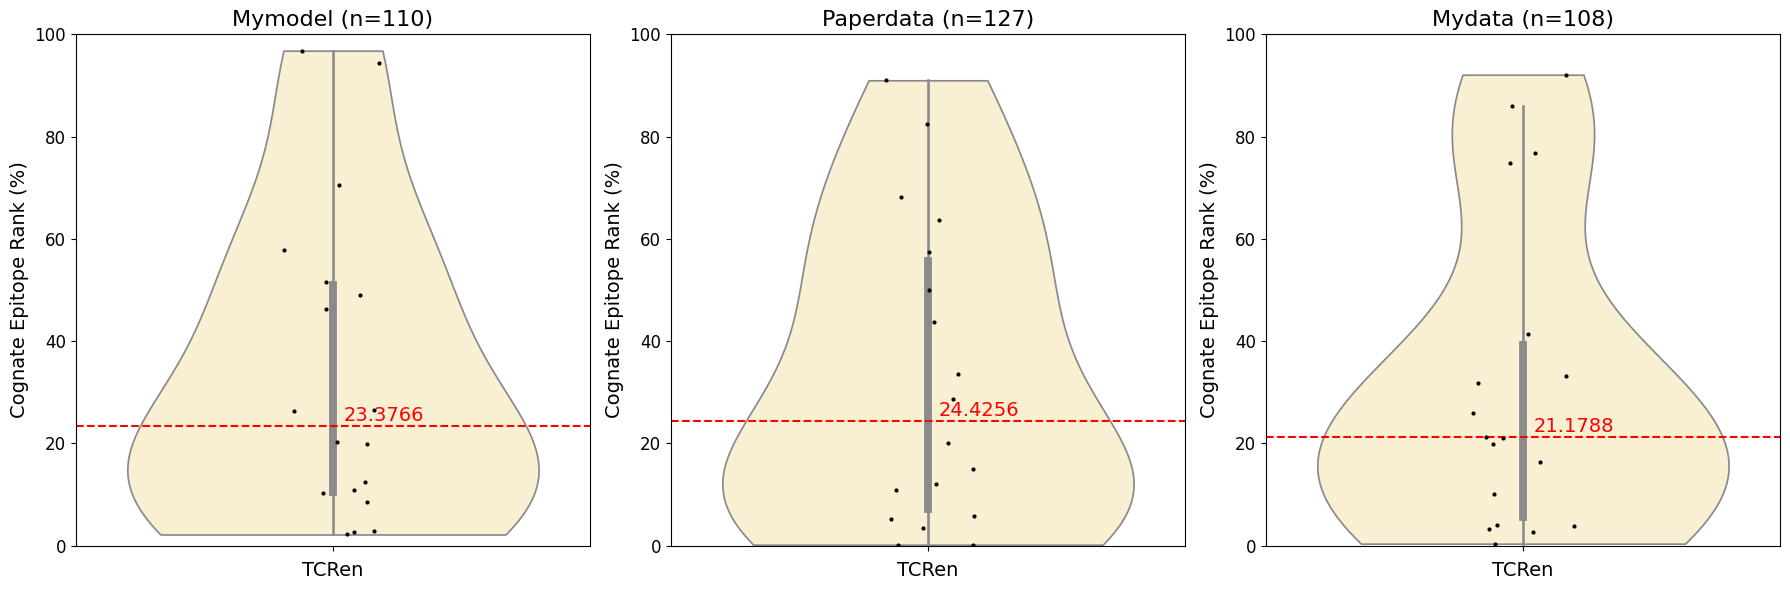

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for three different sets (as examples)
df_test1 = pd.read_csv('./rank_epitopes/output/mycode/mymodel/TCRdist/cognate_epitope_rank.csv')
df_test2 = pd.read_csv('./rank_epitopes/output/mycode/theirmodel_paperdata/TCRdist/cognate_epitope_rank.csv')
df_test3 = pd.read_csv('./rank_epitopes/output/mycode/theirmodel_mydata/TCRdist/cognate_epitope_rank.csv')

# List of DataFrames
dfs = [df_test1, df_test2, df_test3]

# Calculate the medians for each DataFrame
medians = [df['cognate_epitope_rank'].median() for df in dfs]

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust size as needed for 3 plots side by side

# Titles for each subplot (you can customize these)
titles = ["Mymodel (n=110)", "Paperdata (n=127)", "Mydata (n=108)"]

# Loop through each DataFrame and corresponding axis to create the plots
for i, (df, ax, median) in enumerate(zip(dfs, axes, medians)):
    # Create the violin plot for each DataFrame
    sns.violinplot(data=df, y='cognate_epitope_rank', inner='box', color="#fff2cc90", cut=0, ax=ax)
    sns.stripplot(data=df, y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=ax)

    # Add a horizontal line for the median
    ax.axhline(median, color='red', linestyle='--', label=f'Median: {median:.4f}')
    ax.text(0.02, median + 1, f'{median:.4f}', color='red', ha='left', fontsize=14)

    # Set titles and labels for each subplot
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel("TCRen", fontsize=14)
    ax.set_ylabel("Cognate Epitope Rank (%)", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    # Configure the Y-axis limits
    ax.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.show()


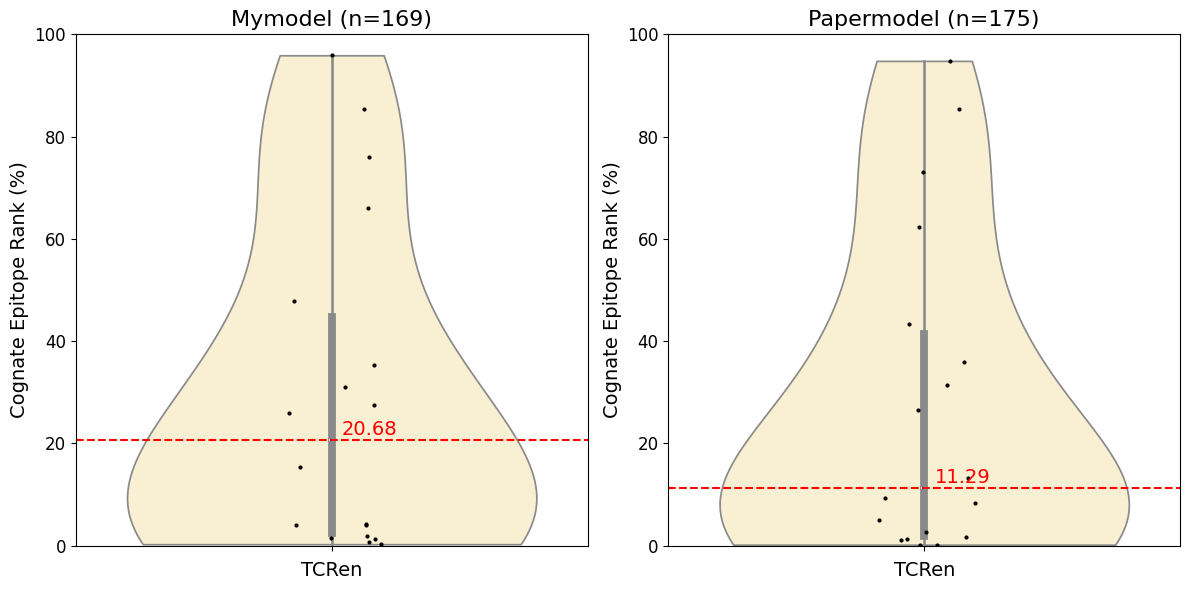

In [21]:
# Load the data for three different sets (as examples)
df_test2 = pd.read_csv('./rank_epitopes/output/theircode/mymodel_classII/cognate_epitope_rank.csv')
df_test3 = pd.read_csv('./rank_epitopes/output/theircode/theirmodel_classII/cognate_epitope_rank.csv')

# List of DataFrames
dfs = [df_test2, df_test3]

# Calculate the medians for each DataFrame
medians = [df['cognate_epitope_rank'].median() for df in dfs]

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust size as needed for 3 plots side by side

# Titles for each subplot (you can customize these)
titles = ["Mymodel (n=169)", "Papermodel (n=175)"]

# Loop through each DataFrame and corresponding axis to create the plots
for i, (df, ax, median) in enumerate(zip(dfs, axes, medians)):
    # Create the violin plot for each DataFrame
    sns.violinplot(data=df, y='cognate_epitope_rank', inner='box', color="#fff2cc90", cut=0, ax=ax)
    sns.stripplot(data=df, y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=ax)

    # Add a horizontal line for the median
    ax.axhline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    ax.text(0.02, median + 1, f'{median:.2f}', color='red', ha='left', fontsize=14)

    # Set titles and labels for each subplot
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel("TCRen", fontsize=14)
    ax.set_ylabel("Cognate Epitope Rank (%)", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    # Configure the Y-axis limits
    ax.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.show()

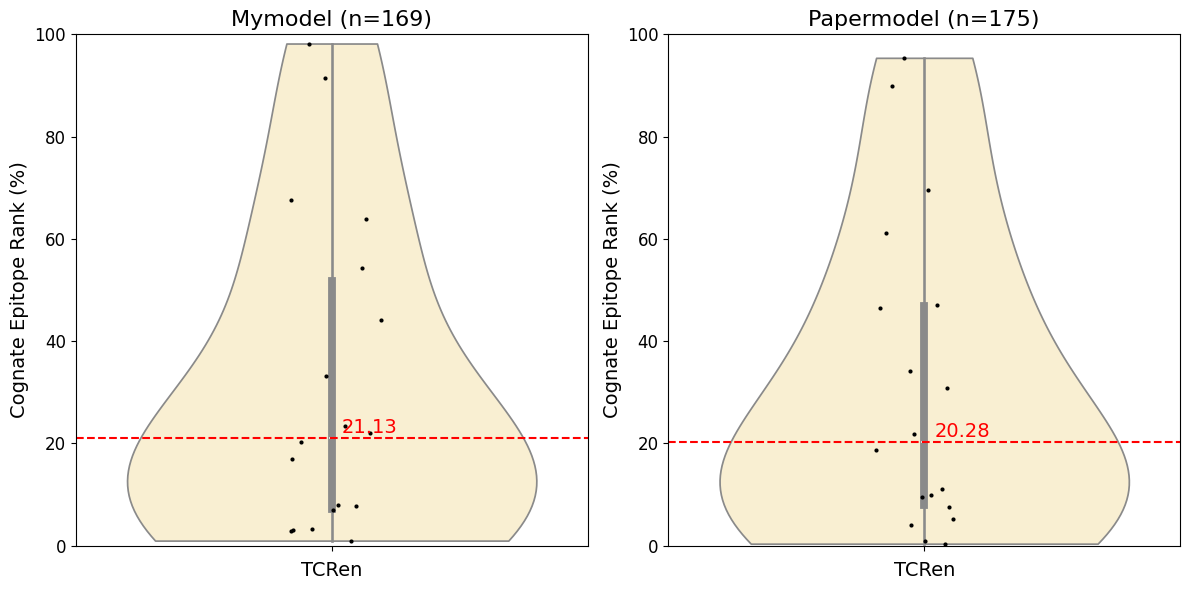

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for three different sets (as examples)
df_test2 = pd.read_csv('./rank_epitopes/output/mycode/mymodel_classII/TCRdist/cognate_epitope_rank.csv')
df_test3 = pd.read_csv('./rank_epitopes/output/mycode/theirmodel_classII/TCRdist/cognate_epitope_rank.csv')

# List of DataFrames
dfs = [df_test2, df_test3]

# Calculate the medians for each DataFrame
medians = [df['cognate_epitope_rank'].median() for df in dfs]

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust size as needed for 3 plots side by side

# Titles for each subplot (you can customize these)
titles = ["Mymodel (n=169)", "Papermodel (n=175)"]

# Loop through each DataFrame and corresponding axis to create the plots
for i, (df, ax, median) in enumerate(zip(dfs, axes, medians)):
    # Create the violin plot for each DataFrame
    sns.violinplot(data=df, y='cognate_epitope_rank', inner='box', color="#fff2cc90", cut=0, ax=ax)
    sns.stripplot(data=df, y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=ax)

    # Add a horizontal line for the median
    ax.axhline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    ax.text(0.02, median + 1, f'{median:.2f}', color='red', ha='left', fontsize=14)

    # Set titles and labels for each subplot
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel("TCRen", fontsize=14)
    ax.set_ylabel("Cognate Epitope Rank (%)", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    # Configure the Y-axis limits
    ax.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.show()


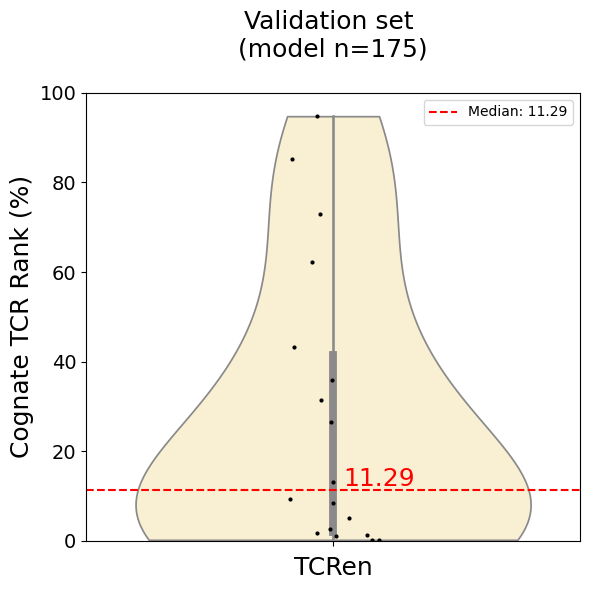

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv("./rank_epitopes/output/theircode/theirmodel_classII/cognate_epitope_rank.csv")

# Calculate the medians
median_test = df_test['cognate_epitope_rank'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='cognate_epitope_rank', inner='box', color="#fff2cc90", cut=0, ax=axes)
sns.stripplot(data=df_test, y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("Validation set \n (model n=175) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()